In [23]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from shapely.geometry import Point
# import mapclassify

import matplotlib
import matplotlib.pyplot as plt 

# import folium
# import plotly_express as px

# import urllib
import requests

In [24]:
## Down load data from US Census

path = "ACS_2019_5YR_TRACT_25.gdb.zip"
try:
    open(path)

except:
    url = "https://www2.census.gov/geo/tiger/TIGER_DP/2019ACS/ACS_2019_5YR_TRACT_25.gdb.zip"
    r = requests.get(url, allow_redirects=True)
    open('./ACS_2019_5YR_TRACT_25.gdb.zip', 'wb').write(r.content)
# finally:
#     fiona.listlayers(path)


In [25]:
fiona.listlayers(path)

['X01_AGE_AND_SEX',
 'X02_RACE',
 'X03_HISPANIC_OR_LATINO_ORIGIN',
 'X04_ANCESTRY',
 'X05_FOREIGN_BORN_CITIZENSHIP',
 'X06_PLACE_OF_BIRTH',
 'X07_MIGRATION',
 'X08_COMMUTING',
 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
 'X10_GRANDPARENTS_GRANDCHILDREN',
 'X11_HOUSEHOLD_FAMILY_SUBFAMILIES',
 'X12_MARITAL_STATUS_AND_HISTORY',
 'X13_FERTILITY',
 'X14_SCHOOL_ENROLLMENT',
 'X15_EDUCATIONAL_ATTAINMENT',
 'X16_LANGUAGE_SPOKEN_AT_HOME',
 'X17_POVERTY',
 'X18_DISABILITY',
 'X19_INCOME',
 'X20_EARNINGS',
 'X21_VETERAN_STATUS',
 'X22_FOOD_STAMPS',
 'X23_EMPLOYMENT_STATUS',
 'X25_HOUSING_CHARACTERISTICS',
 'X27_HEALTH_INSURANCE',
 'X28_COMPUTER_AND_INTERNET_USE',
 'X29_VOTING_AGE_POPULATION',
 'X99_IMPUTATION',
 'X24_INDUSTRY_OCCUPATION',
 'X26_GROUP_QUARTERS',
 'TRACT_METADATA_2019',
 'ACS_2019_5YR_TRACT_25_MASSACHUSETTS']

In [26]:
df = gpd.read_file(path,layer='ACS_2019_5YR_TRACT_25_MASSACHUSETTS')
df_meta = gpd.read_file(path,layer='TRACT_METADATA_2019')
df_demo = gpd.read_file(path,layer='X01_AGE_AND_SEX')
df_income = gpd.read_file(path,layer='X19_INCOME')

In [27]:
df.head(3).T.sort_index()

/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts o

,0,1,2
ALAND,53031300.0,25548737.0,3467387.0
AWATER,1639215.0,1449315.0,9794.0
COUNTYFP,027,027,001
FUNCSTAT,S,S,S
GEOID,25027724100,25027759100,25001012601
GEOID_Data,14000US25027724100,14000US25027759100,14000US25001012601
INTPTLAT,+42.2566908,+42.2096822,+41.6624989
INTPTLON,-072.1581690,-072.0401777,-070.3180404
MTFCC,G5020,G5020,G5020
NAME,7241,7591,126.01


In [28]:
fig,ax = plt.subplots(figsize=(15,10))
df.plot(ax=ax)

plt.show()

## TIPS TO FIND USEFULL COLUMNS

* `r'*e1$'` for (Estimate)
* `r'*m1$'` for (Margin of Error)

In [19]:
# df_demo.columns
# df_income.columns
# df_commuting.columns

In [30]:

(
    df_meta
    .loc[:,['Short_Name', 'Full_Name']] # ignored columns: ,'geometry'
 
 ## Demographic related columns 
    .loc[
        (df_meta.Short_Name.str.match(r'^B010..e.'))
        & ~(df_meta.Full_Name.str.match(r'.+(RACE|WHITE|ASIAN|HISPANIC|AFRICAN AMERICAN|NATIVE HAWAIIAN|AMERICAN INDIAN).+'))
        & ~(df_meta.Full_Name.str.match(r'(AGE|SEX)'))
         ] 
## Income related columns 
    #.loc[
    #    (df_meta.Short_Name.str.match(r'^B190.+e.+'))
    #   & ~(df_meta.Full_Name.str.match(r'.+(RACE|WHITE|ASIAN|HISPANIC|AFRICAN AMERICAN|NATIVE HAWAIIAN|AMERICAN INDIAN).+'))
    #   & ~(df_meta.Full_Name.str.match(r'(AGE|SEX)'))
    #    #(df_meta.Full_Name.str.match(r'.+Total.+'))
    #    #(df_meta.Full_Name.str.match(r'.+Total.+'))
    #    ]
 ## Commuting
    #.loc[
    #     (df_meta.Short_Name.str.match(r'^B08.+e.+')) &
    #     ~(df_meta.Full_Name.str.match(r'(SEX|YEARS|AGE)')) &
    #     #(df_meta.Full_Name.str.match(r'.+Total.+')) &
    #     (df_meta.Full_Name.str.match(r'.+VEHICLES.+')) &
    #     (df_meta.Full_Name.str.match(r'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total:'))
    #     # MEANS OF TRANSPORTATION TO WORK
    #]


    .set_index('Short_Name')
    .Full_Name
    .to_dict()
)

{'B01002e1': 'MEDIAN AGE BY SEX: Total: Total population -- (Estimate)',
 'B01002e2': 'MEDIAN AGE BY SEX: Total: Male: Total population -- (Estimate)',
 'B01002e3': 'MEDIAN AGE BY SEX: Total: Female: Total population -- (Estimate)',
 'B01003e1': 'TOTAL POPULATION: Total: Total population -- (Estimate)'}

## Join usefull data to Geodataframe

In [55]:
DF = (
    df
 ## Remove   waterbodies
    .query("ALAND > 100")

## INCOME
    .merge(
        df_income.loc[:,['GEOID'
            ,'B19013e1' # 'MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS): Median household income in the past 12 months (in 2019 inflation-adjusted dollars): Households -- (Estimate)',
            ,'B19083e1' # GINI INDEX OF INCOME INEQUALITY
                ]]
        .set_index('GEOID')
        ,how='left',left_on='GEOID_Data', right_index=True
    )
## POPULATION
    .merge(
        df_demo
        .loc[:,['GEOID'
            # ,'B01001e1' # 'SEX BY AGE: Total: Total population -- (Estimate)',
            ,'B01001e2' # 'SEX BY AGE: Male: Total population -- (Estimate)',
            ,'B01001e26'# 'SEX BY AGE: Female: Total population -- (Estimate)'
            ,'B01003e1' # 'TOTAL POPULATION: Total: Total population -- (Estimate)'
        ]]
        .set_index('GEOID')
        ,how='left',left_on='GEOID_Data', right_index=True
        
    )
## COMMUTING
    .merge(
        df_commuting
        .loc[:,['GEOID'
            ,'B08201e1' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: Households -- (Estimate)',
            ,'B08201e2' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: No vehicle available: Households -- (Estimate)',
            ,'B08201e3' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 1 vehicle available: Households -- (Estimate)',
            ,'B08201e4' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 2 vehicles available: Households -- (Estimate)',
            ,'B08201e5' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 3 vehicles available: Households -- (Estimate)',
            ,'B08201e6' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 4 or more vehicles available: Households -- (Estimate)'
                ]]
        .set_index('GEOID')
        ,how='left',left_on='GEOID_Data', right_index=True

    )
).copy()

DF = (
    DF
    .assign(
        population_density = DF.B01003e1/DF.ALAND*1_000**2
    )
)

DF.head(3).T.sort_index()

/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/tiramirez/Documents/geo_exploration/env/lib/python3.9/site-packages/pandas/io/formats/printing.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts o

,0,1,2
ALAND,53031300.0,25548737.0,3467387.0
AWATER,1639215.0,1449315.0,9794.0
B01001e2,1818.0,1033.0,1709.0
B01001e26,1910.0,1007.0,1647.0
B01003e1,3728.0,2040.0,3356.0
B08201e1,1510.0,795.0,1217.0
B08201e2,111.0,29.0,130.0
B08201e3,442.0,205.0,345.0
B08201e4,552.0,333.0,458.0
B08201e5,248.0,163.0,212.0


In [50]:
def map(df,col):
    fig,ax = plt.subplots(figsize=(25,15))
    # ax = plt.axes(projection=ccrs.Mercator())
    (
        df
        # .query("INTPTLAT >='+41.50' and INTPTLAT <='+43.25'")
        # .query("INTPTLON >='-070.50' and INTPTLON <='-071.80'")
        .plot(
            ax=ax
            ,column=col
            #,cmap='RdYlGn'
            ,scheme='naturalbreaks'
            ,legend=True
            # ,alpha=0.6
        )
    )
    ax.set_xlim(-71.30,-70.85)
    ax.set_ylim( 42.20, 42.5)
    plt.show()


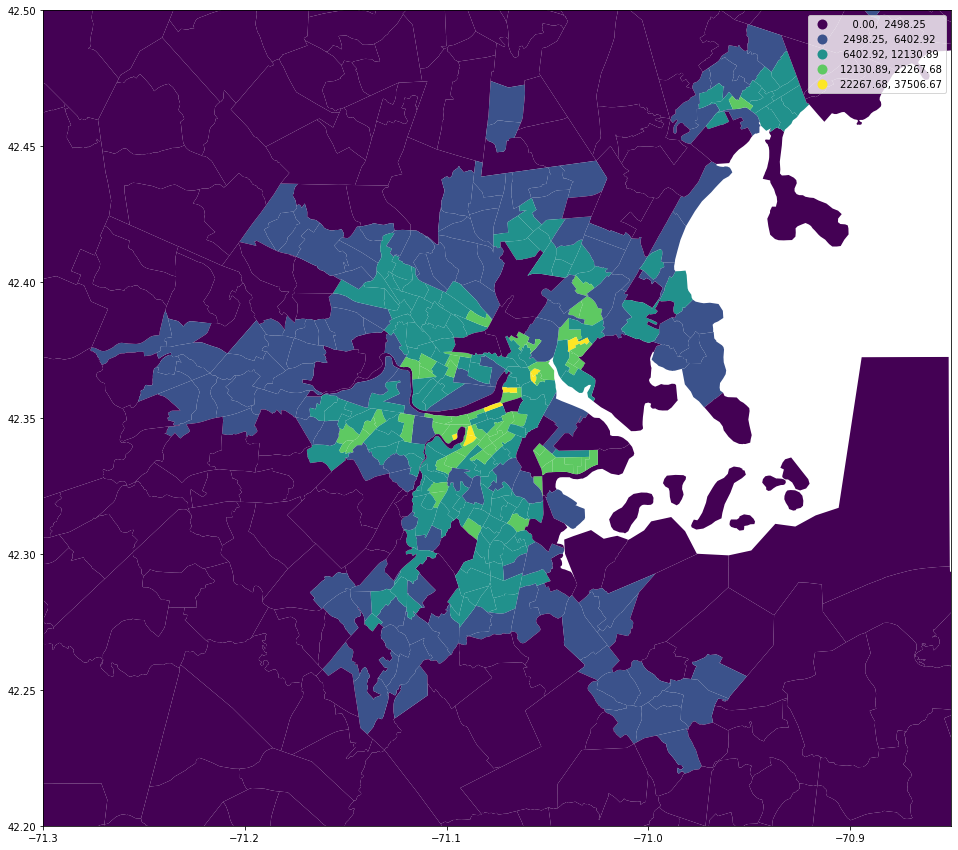

In [56]:
'COUNTYFP'
'ALAND'     # Squared meters

'B19013e1' # 'MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS): Median household income in the past 12 months (in 2019 inflation-adjusted dollars): Households -- (Estimate)',
'B19083e1' # GINI INDEX OF INCOME INEQUALITY

'B01001e2' # 'SEX BY AGE: Male: Total population -- (Estimate)',
'B01001e26'# 'SEX BY AGE: Female: Total population -- (Estimate)'
'B01003e1' # 'TOTAL POPULATION: Total: Total population -- (Estimate)'

'B08201e1' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: Households -- (Estimate)',
'B08201e2' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: No vehicle available: Households -- (Estimate)',
'B08201e3' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 1 vehicle available: Households -- (Estimate)',
'B08201e4' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 2 vehicles available: Households -- (Estimate)',
'B08201e5' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 3 vehicles available: Households -- (Estimate)',
'B08201e6' # 'HOUSEHOLD SIZE BY VEHICLES AVAILABLE: Total: 4 or more vehicles available: Households -- (Estimate)'

'population_density' # Hab / km2
map(DF,'population_density')


In [59]:
(
    df.ALAND.sum()/1_000**2
    # .sum()
)

20204.387828

In [58]:
DF.B01003e1.sum()/DF.ALAND.sum()*1_000**2

339.05932010007945